<h3>Predict which passengers are transported to an alternate dimension - Kaggle Competition</h3>
<br><h5>Features and their description.</h5>
<ul>
    <li>PassengerId - A unique Id for each passenger. </li>
    <li>HomePlanet - The planet the passenger departed from. </li>
    <li>CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage.  </li>
    <li>Cabin - The cabin number where the passenger is staying. </li>
    <li>Destination - The planet the passenger will be debarking to. </li>
    <li>Age - The age of the passenger. </li>
    <li>VIP - Whether the passenger has paid for special VIP service during the voyage. </li>
    <li>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. </li>
    <li>Name - The first and last names of the passenger. </li>
    <li>Transported - Whether the passenger was transported to another dimension. </li>
 </ul>

<h4>Importing Libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
import seaborn as sns
import warnings
#import tensorflow as tf
warnings.filterwarnings("ignore")

<Figure size 720x720 with 0 Axes>

<h4>Importing Dataset</h4>

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

<h4>Checking the Data</h4>

In [3]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_data.shape

(8693, 14)

In [6]:
test_data.shape

(4277, 13)

<h4>Exploratory Data Analysis</h4>

<AxesSubplot:xlabel='Age', ylabel='RoomService'>

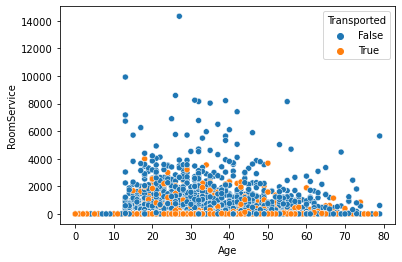

In [7]:
sns.scatterplot(x = "Age",y = "RoomService", hue = "Transported", data = train_data)

<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

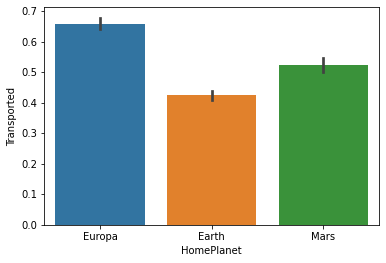

In [8]:
sns.barplot(x = "HomePlanet", y = "Transported", data = train_data)

In [9]:
train_data["HomePlanet"].value_counts(dropna = False)

Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: HomePlanet, dtype: int64

In [10]:
train_data["CryoSleep"].value_counts(dropna = False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [11]:
train_data["Destination"].value_counts(dropna = False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [12]:
train_data["Cabin"].value_counts(dropna = False)

NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64

In [13]:
train_data["VIP"].value_counts(dropna = False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

<AxesSubplot:>

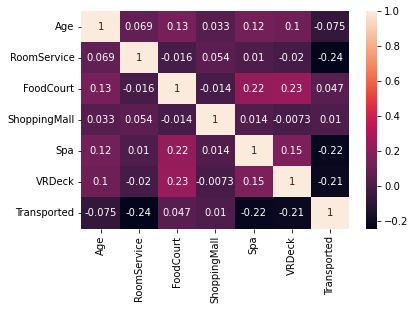

In [14]:
sns.heatmap(train_data.corr(),annot = True)

In [15]:
train_data["RoomService"].value_counts(dropna = False)

0.0       5577
NaN        181
1.0        117
2.0         79
3.0         61
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1274, dtype: int64

In [16]:
train_data["FoodCourt"].value_counts(dropna = False)

0.0       5456
NaN        183
1.0        116
2.0         75
3.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1508, dtype: int64

In [17]:
train_data["ShoppingMall"].value_counts(dropna = False)

0.0       5587
NaN        208
1.0        153
2.0         80
3.0         59
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1116, dtype: int64

In [18]:
train_data["Spa"].value_counts(dropna = False)

0.0       5324
NaN        183
1.0        146
2.0        105
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1328, dtype: int64

In [19]:
train_data["VRDeck"].value_counts(dropna = False)

0.0       5495
NaN        188
1.0        139
2.0         70
3.0         56
          ... 
297.0        1
1788.0       1
1113.0       1
9244.0       1
3235.0       1
Name: VRDeck, Length: 1307, dtype: int64

In [20]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<h4>Defining Variables</h4>

In [21]:
train_data_new = train_data.drop(["Name","PassengerId","Cabin","Age"],axis=1)
train_data_new.fillna({"HomePlanet": train_data_new["HomePlanet"].mode(),
                     "CryoSleep":train_data_new["CryoSleep"].mode(),
                     "Destination":train_data_new["Destination"].mode(),
                     "RoomService":train_data_new["RoomService"].median(),
                     "FoodCourt":train_data_new["FoodCourt"].median(),
                      "ShoppingMall":train_data_new["ShoppingMall"].median(),
                      "Spa":train_data_new["Spa"].median(),
                      "VRDeck":train_data_new["VRDeck"].median()},inplace = True)
#train_data_new.dropna(inplace = True,axis=0)
X = train_data_new.drop("Transported",axis=1)
y = train_data_new["Transported"]

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   VIP           8490 non-null   object 
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
dtypes: float64(5), object(4)
memory usage: 611.4+ KB


In [23]:
X.head(10)

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Europa,False,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,False,109.0,9.0,25.0,549.0,44.0
2,Europa,False,TRAPPIST-1e,True,43.0,3576.0,0.0,6715.0,49.0
3,Europa,False,TRAPPIST-1e,False,0.0,1283.0,371.0,3329.0,193.0
4,Earth,False,TRAPPIST-1e,False,303.0,70.0,151.0,565.0,2.0
5,Earth,False,PSO J318.5-22,False,0.0,483.0,0.0,291.0,0.0
6,Earth,False,TRAPPIST-1e,False,42.0,1539.0,3.0,0.0,0.0
7,Earth,True,TRAPPIST-1e,False,0.0,0.0,0.0,0.0,0.0
8,Earth,False,TRAPPIST-1e,False,0.0,785.0,17.0,216.0,0.0
9,Europa,True,55 Cancri e,False,0.0,0.0,0.0,0.0,0.0


In [24]:
X = pd.get_dummies(X,drop_first = True,dummy_na = True)
y = pd.get_dummies(y,drop_first = True)

In [25]:
X.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_nan,CryoSleep_True,CryoSleep_nan,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_True,VIP_nan
0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0
1,109.0,9.0,25.0,549.0,44.0,0,0,0,0,0,0,1,0,0,0
2,43.0,3576.0,0.0,6715.0,49.0,1,0,0,0,0,0,1,0,1,0
3,0.0,1283.0,371.0,3329.0,193.0,1,0,0,0,0,0,1,0,0,0
4,303.0,70.0,151.0,565.0,2.0,0,0,0,0,0,0,1,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [28]:
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix
train_conf_matrix = confusion_matrix(y_train,train_pred)
test_conf_matrix = confusion_matrix(y_test,test_pred)

In [31]:
pd.DataFrame(test_conf_matrix)

,0,1
0,1011,298
1,234,1065


In [32]:
pd.DataFrame(train_conf_matrix)

,0,1
0,2318,688
1,578,2501


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1309
           1       0.78      0.82      0.80      1299

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [34]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      3006
           1       0.78      0.81      0.80      3079

    accuracy                           0.79      6085
   macro avg       0.79      0.79      0.79      6085
weighted avg       0.79      0.79      0.79      6085



In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X.values,idx)
                 for idx in range(X.shape[1])],index = X.columns)
print(vif)

RoomService                  1.245007
FoodCourt                    1.346881
ShoppingMall                 1.130146
Spa                          1.220533
VRDeck                       1.233427
HomePlanet_Europa            1.981983
HomePlanet_Mars              1.555170
HomePlanet_nan               1.041553
CryoSleep_True               1.864993
CryoSleep_nan                1.036065
Destination_PSO J318.5-22    1.142331
Destination_TRAPPIST-1e      1.858516
Destination_nan              1.021303
VIP_True                     1.078546
VIP_nan                      1.022124
dtype: float64


<h4>Contemplating for test data</h4>

In [36]:
test_data_new = test_data.drop(["Name","PassengerId","Cabin","Age"],axis=1)
test_data_new.fillna({"HomePlanet": test_data_new["HomePlanet"].mode(),
                     "CryoSleep":test_data_new["CryoSleep"].mode(),
                     "Destination":test_data_new["Destination"].mode(),
                     "RoomService":test_data_new["RoomService"].median(),
                     "FoodCourt":test_data_new["FoodCourt"].median(),
                      "ShoppingMall":test_data_new["ShoppingMall"].median(),
                      "Spa":test_data_new["Spa"].median(),
                      "VRDeck":test_data_new["VRDeck"].median()},inplace = True)
#test_data_new.dropna(inplace = True,axis=0)
X_dash = test_data_new

In [37]:
X_dash = pd.get_dummies(X_dash,drop_first = True,dummy_na = True)

In [38]:
new_predict = model.predict(X_dash)

In [40]:
predict_test= [True if x else False for x in new_predict]

In [41]:
submission = {'PassengerId': test_data.PassengerId, 'Transported': predict_test}
df_submission = pd.DataFrame(data=submission)

In [42]:
df_submission.to_csv('Sample_submission.csv', index=False)